In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('card_transdata.csv')

Возьмем данные с описанием кредитной транзакции и таргетом, была ли транзакция мошеннической или нет.

In [18]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Пусть мы внедрили новую нейронку для определения мошшенической транзакции и хотим оценить, какой процент фрода все-таки может обходить нейронку. Для того, чтобы узнать этот процент, нам нужно позвонить всем людям, с чьей карты совершалась транзакция. В масштабах банка звонить всей генеральной совокупности клиентов дорого, поэтому хотим оценить долю фрода на выборке в 200 человек. 

In [24]:
rng = np.random.default_rng(24122000)
called = rng.choice(df.fraud, size=200)

In [28]:
called.mean() 

0.085

Хотим интервальную оценку. Сделаем из 1-ой выборки - 10000 выборок, и посчитаем долю фрода в каждой из них

In [41]:
n_boot = 10000
fraud_pcts = [(rng.choice(called, size=len(called))).mean() for _ in range(n_boot)]

Найдем наивный доверительный интервал с уровнем значимости 0.05 для истинной доли фрода

In [45]:
[np.quantile(fraud_pcts, 0.025), np.quantile(fraud_pcts, 0.975)]

[0.05, 0.125]

Получается, что истинный процент фрода, который обходит нейронку, с вероятностью 95% лежит в интервале от 5% до 12.5%

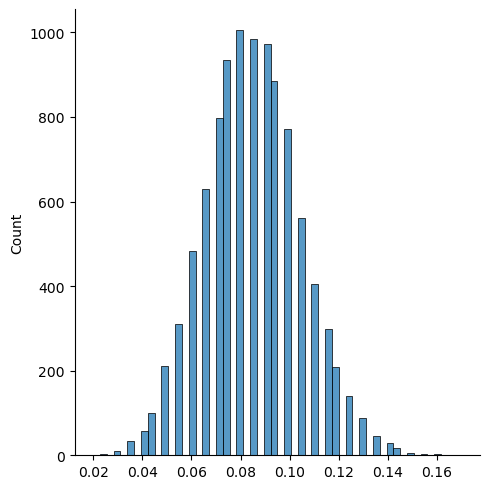

In [42]:
sns.displot(x=fraud_pcts)